**Core Task 1**

Explore the physics of the undamped, undriven pendulum initially at rest.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

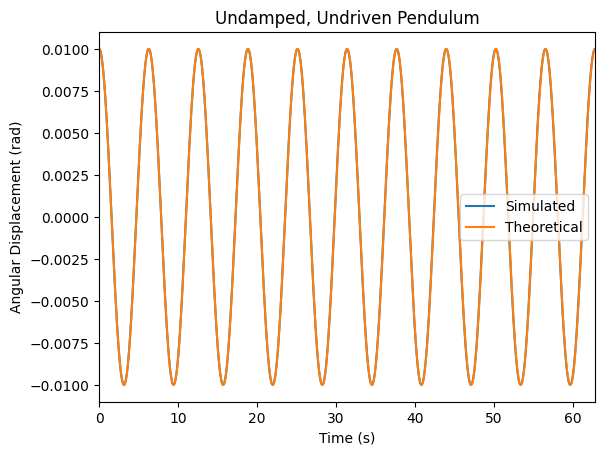

In [3]:
# Setting constants
g = 9.81
l = g
omega_d = 2/3
T = 2*np.pi * np.sqrt(l/g)
m = 1.0

# Setting the initial conditions and how many oscillations we are simulating
num_oscillations = 10000
theta0 = 0.01
dtheta0_dt = 0.0

def pendulum_model(t, y, q, F):
  """
  Models the equation of motion for the damped, driven pendulum via a pair of linked first-order equations.

  Args:
    time
    y: tuple containing y_0 and y_1, the angular position and angular velocity, respectively.
    q: Damping coefficient
    F: Driving couple

  Returns:
    The angular velocity, dy0_dt, and the angular acceleration, dy1_dt.
  """
  y_0, y_1, = y
  dy0_dt = y_1
  dy1_dt = -g/l * np.sin(y_0) - q * y_1 + F*np.sin(omega_d * t)
  return dy0_dt, dy1_dt

# Setting values for q and F.
q = 0
F = 0

# Specifying the start and end times of the simulation.
t_initial = 0.0
t_final = num_oscillations * T

# Solving the differential equations for the pendulum
initial_state = [theta0, dtheta0_dt]
solution = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q, F], t_eval=np.linspace(t_initial, t_final, 1000000))

#Unpacking the solution.
time, theta, dtheta_dt = solution.t, solution.y[0], solution.y[1]

plt.plot(time, theta, label='Simulated')
plt.plot(time, theta0*np.cos(time), label='Theoretical')
plt.xlim(0, 10*T)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Undamped, Undriven Pendulum')
plt.show()

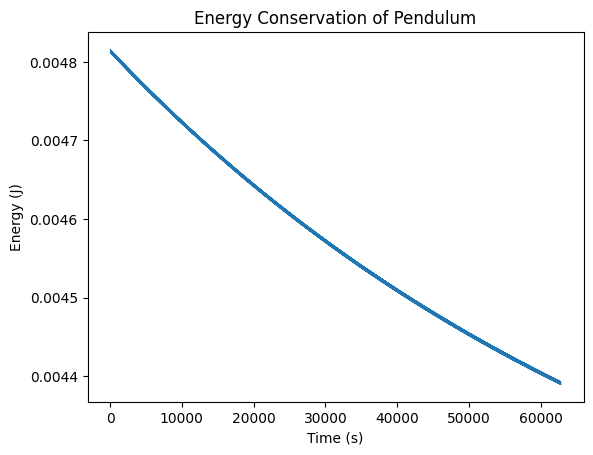

In [4]:
def calc_tot_energy(time, theta, dtheta_dt, q, F):
  # Calculates the kinetic and potential energies of the pendulum and takes the sum to return the total energy.
  KE = 0.5 * m * l **2 * dtheta_dt **2
  PE = m * g * l * (1-np.cos(theta))
  tot_energy = KE + PE
  return tot_energy

# Calculates the total energy at each point that solve_ivp evaluates at.
energies = calc_tot_energy(solution.t, solution.y[0], solution.y[1], q, F)

# Unpacking the solution.
time, theta, dtheta_dt = solution.t, solution.y[0], solution.y[1]

plt.figure()
plt.plot(time, energies, linewidth=0.25)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy Conservation of Pendulum')
plt.show()

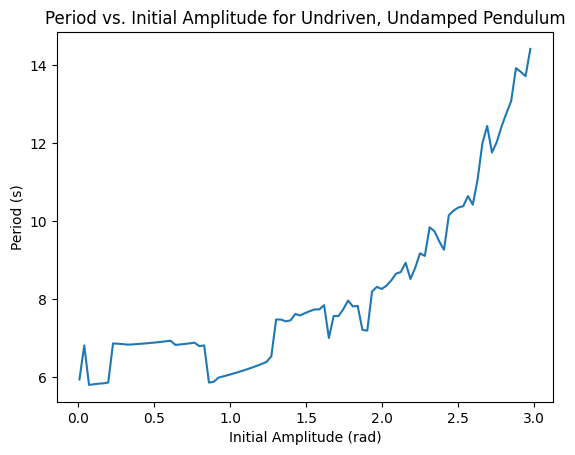

In [5]:
def calc_period(theta0):
  # Returns the period (for an undriven, undamped pendulum initially at rest) for a given initial displacement value.
  initial_state = [theta0, 0.0]
  time_span = (0, 100*T)
  solution = scipy.integrate.solve_ivp(pendulum_model, time_span, initial_state, args=(0,0))

  peaks, _ = scipy.signal.find_peaks(solution.y[0])
  peak_diffs = np.diff(solution.t[peaks])
  return peak_diffs[0] if peak_diffs.size else np.nan # Checks no. of elements in peak_diffs and if it is not zero, it then returns the first value, i.e. the first period, in the list.

#Sweeps through the range of initial displacement values (0<theta0<pi) and returuns the period for each.
theta0_sweep = np.linspace(0.01, np.pi - 0.01, 100)
period_response = [calc_period(theta0) for theta0 in theta0_sweep]

plt.plot(theta0_sweep, period_response)
plt.xlabel('Initial Amplitude (rad)')
plt.ylabel('Period (s)')
plt.title('Period vs. Initial Amplitude for Undriven, Undamped Pendulum')
plt.show()

**Conclusions**

Modelled the equation of motion for the undamped, undriven pendulum. Showed that energy is not conserved using this algorithm. Demonstrated that the oscillation period increases with the initial amplitude; highlighting the limitations of the small-angle approximation.

Value of the period for 𝜃$_0$ = $\frac{𝜋}{2}$ is 7.75s.

**Core Task 2**

Explore the damped case and how varying the driving couple changes the angular velocity and displacement response.

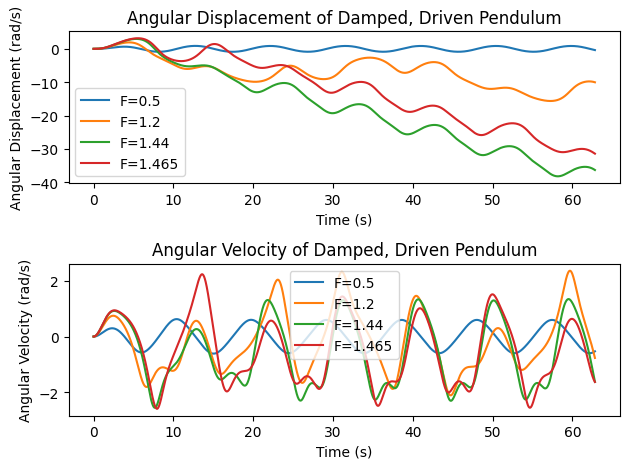

In [6]:
# Setting constants
g = 9.81
l = g
omega_d = 2/3
T = 2*np.pi
m = 1.0

# Setting the initial conditions and how many oscillations we are simulating
num_oscillations = 10
theta0 = 0.01
dtheta0_dt = 0.0

def pendulum_model(t, y, q, F):
  # Models the equation of motion for the damped, driven pendulum via a pair of linked first-order equations. Returns the angular velocity, dy0_dt, and the angular acceleration, dy1_dt.
  y_0, y_1, = y
  dy0_dt = y_1
  dy1_dt = -g/l * np.sin(y_0) - q * y_1 + F*np.sin(omega_d * t)
  return dy0_dt, dy1_dt

# Setting values for q and F.
q = 0.5
F0 = 0.5
F1 = 1.2
F2 = 1.44
F3 = 1.465

# Specifying the start and end times of the simulation.
t_initial = 0.0
t_final = num_oscillations * T

# Solving the differential equations for each value of F.
initial_state = [theta0, dtheta0_dt]
solutionF0 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q, F0], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF1 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q, F1], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF2 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q, F2], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF3 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q, F3], t_eval=np.linspace(t_initial, t_final, 100000))

# Unpacking the solution for each value of F; leaving time as it is the same for all/
time, thetaF0, dtheta_dtF0 = solutionF0.t, solutionF0.y[0], solutionF0.y[1]
thetaF1, dtheta_dtF1 = solutionF1.y[0], solutionF1.y[1]
thetaF2, dtheta_dtF2 = solutionF2.y[0], solutionF2.y[1]
thetaF3, dtheta_dtF3 = solutionF3.y[0], solutionF3.y[1]

# Displacement plot
plt.subplot(2, 1, 1)
plt.plot(time, thetaF0, label='F=0.5')
plt.plot(time, thetaF1, label='F=1.2')
plt.plot(time, thetaF2, label='F=1.44')
plt.plot(time, thetaF3, label='F=1.465')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad/s)')
plt.title('Angular Displacement of Damped, Driven Pendulum')

# Velocity plot
plt.subplot(2, 1, 2)
plt.plot(time, dtheta_dtF0, label='F=0.5')
plt.plot(time, dtheta_dtF1, label='F=1.2')
plt.plot(time, dtheta_dtF2, label='F=1.44')
plt.plot(time, dtheta_dtF3, label='F=1.465')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity of Damped, Driven Pendulum')
plt.tight_layout()

**Conclusions**

The period of oscillation remains approximately constant as we change the values of F through the given values of 0.5, 1.2, 1.44, 1.465. The pattern becomes more chaotic and therefore can deduce that the motion is a sum of many sinusoids of different frequencies and amplitudes. We also see the peak to peak amplitude of the angular velocity increase with F.

**Supplementary Task 1**

Investigate sensitivity to initial conditions. (𝜃$_0$ = 0.2 and 𝜃$_0$ = 0.20001)

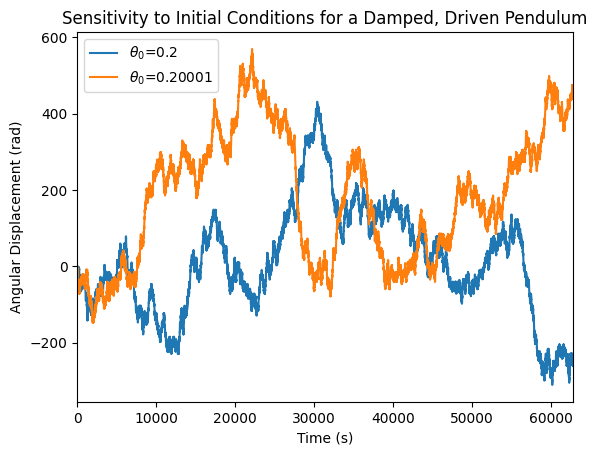

In [7]:
# Setting constants
g = 9.81
l = g
omega_d = 2/3
T = 2*np.pi * np.sqrt(l/g)
m = 1.0

# Setting roughly how many oscillations we are simulating
num_oscillations = 10000

def pendulum_model(t, y, q, F):
  # Models the equation of motion for the damped, driven pendulum via a pair of linked first-order equations. Returns the angular velocity, dy0_dt, and the angular acceleration, dy1_dt.
  y_0, y_1, = y
  dy0_dt = y_1
  dy1_dt = -g/l * np.sin(y_0) - q * y_1 + F*np.sin(omega_d * t)
  return dy0_dt, dy1_dt

# Setting values for q and F.
q = 0.5
F = 1.2

# Specifying the start and end times of the simulation.
t_initial = 0.0
t_final = num_oscillations * T

# Solving the differential equations for the pendulum
initial_state_1 = [0.2, 0.0]
initial_state_2 = [0.20001, 0.0]
solution_1 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state_1, args=[q, F], t_eval=np.linspace(t_initial, t_final, 100000))
solution_2 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state_2, args=[q, F], t_eval=np.linspace(t_initial, t_final, 100000))

# Unpacking the solution for each of the two initial conditions
time, theta_1, dtheta_dt_1 = solution_1.t, solution_1.y[0], solution_1.y[1]
time, theta_2, dtheta_dt_2 = solution_2.t, solution_2.y[0], solution_2.y[1]

plt.plot(time, theta_1, label=r'$\theta_0$=0.2')
plt.plot(time, theta_2, label=r'$\theta_0$=0.20001')
plt.xlim(0, t_final)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (rad)')
plt.title('Sensitivity to Initial Conditions for a Damped, Driven Pendulum')
plt.show()


**Conclusions**

The two solutions diverge after integrating for a long time and do not match with each other.

**Supplementary Task 2**

Exploring chaotic behaviours.

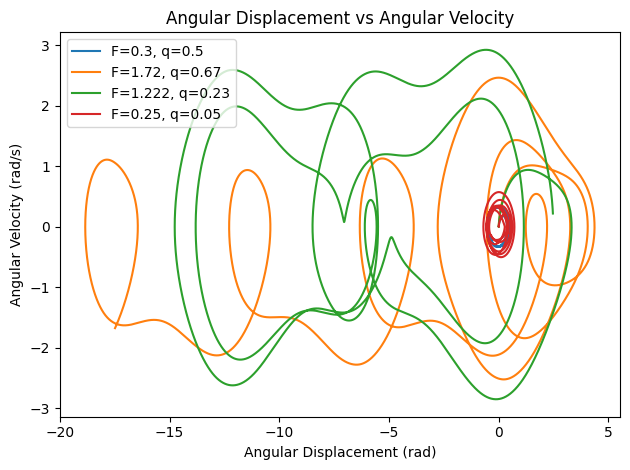

In [ ]:
# Setting constants
g = 9.81
l = g
omega_d = 2/3
T = 2*np.pi
m = 1.0

# Setting the initial conditions and how many oscillations we are simulating
num_oscillations = 10
theta0 = 0.01
dtheta0_dt = 0.0

def pendulum_model(t, y, q, F):
  # Models the equation of motion for the damped, driven pendulum via a pair of linked first-order equations. Returns the angular velocity, dy0_dt, and the angular acceleration, dy1_dt.
  y_0, y_1, = y
  dy0_dt = y_1
  dy1_dt = -g/l * np.sin(y_0) - q * y_1 + F*np.sin(omega_d * t)
  return dy0_dt, dy1_dt

# Setting values for q and F.
q0 = 0.5
q1 = 0.67
q2 = 0.23
q3 = 0.05
F0 = 0.3
F1 = 1.72
F2 = 1.222
F3 = 0.25

# Specifying the start and end times of the simulation.
t_initial = 0.0
t_final = num_oscillations * T

# Solving the differential equations for each value of F.
initial_state = [theta0, dtheta0_dt]
solutionF0 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q0, F0], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF1 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q1, F1], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF2 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q2, F2], t_eval=np.linspace(t_initial, t_final, 100000))
solutionF3 = scipy.integrate.solve_ivp(pendulum_model, [t_initial, t_final], initial_state, args=[q3, F3], t_eval=np.linspace(t_initial, t_final, 100000))

# Unpacking the solution for each pair of values of F and q; leaving time as it is the same for all.
time, thetaF0, dtheta_dtF0 = solutionF0.t, solutionF0.y[0], solutionF0.y[1]
thetaF1, dtheta_dtF1 = solutionF1.y[0], solutionF1.y[1]
thetaF2, dtheta_dtF2 = solutionF2.y[0], solutionF2.y[1]
thetaF3, dtheta_dtF3 = solutionF3.y[0], solutionF3.y[1]

plt.plot(thetaF0, dtheta_dtF0, label='F=0.3, q=0.5')
plt.plot(thetaF1, dtheta_dtF1, label='F=1.72, q=0.67')
plt.plot(thetaF2, dtheta_dtF2, label='F=1.222, q=0.23')
plt.plot(thetaF3, dtheta_dtF3, label='F=0.25, q=0.05')
plt.legend()
plt.xlabel('Angular Displacement (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.title('Angular Velocity vs Angular Displacement')
plt.tight_layout()

**Conclusions**

We see chaotic behaviour in the plot of angular velocity against angular displacement. We also see that the cases with a greater driving couple, F, have greater maximal values for both angular veloocity and angular displacement.